In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_users = pd.read_csv('users.csv')
df_funnel = pd.read_csv('funnel_path.csv')

In [4]:
df_users.head()

,user_id,age,device,income,num_conditions,premium,marketing_channels
0,1001,56,desktop,157490,5,2490.123774,instagram
1,1002,34,desktop,138171,3,1906.228442,paid_search_nb
2,1003,32,desktop,94274,2,1515.217172,paid_search_nb
3,1004,32,desktop,160480,4,2263.763328,tv
4,1005,33,desktop,141943,3,1624.410806,podcast


In [5]:
df_funnel.head()

,user_id,funnel_steps
0,1001,collect_contact_info
1,1001,started_navigator
2,1002,application_submit
3,1002,collect_contact_info
4,1002,phone_connect


In [7]:
# Define order of the funnel steps for data_funnel
custom_order = ['started_navigator', 'collect_contact_info', 'viewed_quotes','application_submit','phone_connect','sign_and_exam']
df_funnel['funnel_steps'] = pd.Categorical(df_funnel['funnel_steps'], categories=custom_order, ordered=True)
# Sort the DataFrame based on the custom-ordered 'value' column
df_funnel = df_funnel.sort_values(by='funnel_steps')

## What is our revenue generation through the funnel?

In [8]:
# Merge datasets on user_id
merged_data = pd.merge(df_funnel, df_users, on='user_id')
print(f'The merged_user_funnel has {merged_data.isnull().sum().sum()} Null values')
# Calculate Revenue at Each Funnel Step

# Calculate revenue for each user
merged_data['revenue'] = merged_data['premium'] * 1.36

#  calculates the total revenue at each step of the funnel.
revenue_summary = merged_data.groupby('funnel_steps')['revenue'].sum().reset_index()

# Display the revenue summary
print(revenue_summary)

The merged_user_funnel has 0 Null values
           funnel_steps       revenue
0     started_navigator  2.327293e+07
1  collect_contact_info  1.675934e+07
2         viewed_quotes  1.213652e+07
3    application_submit  6.456082e+06
4         phone_connect  3.596403e+06
5         sign_and_exam  1.722745e+06


In [9]:
merged_data

,user_id,funnel_steps,age,device,income,num_conditions,premium,marketing_channels,revenue
0,11000,started_navigator,21,mobile_ios,169217,3,1756.614104,podcast,2388.995181
1,11000,collect_contact_info,21,mobile_ios,169217,3,1756.614104,podcast,2388.995181
2,3936,started_navigator,59,desktop,192539,4,2332.406032,facebook,3172.072204
3,3936,collect_contact_info,59,desktop,192539,4,2332.406032,facebook,3172.072204
4,3937,started_navigator,34,desktop,142429,2,1484.439967,paid_search_nb,2018.838355
...,...,...,...,...,...,...,...,...,...
27624,2436,started_navigator,40,desktop,125288,3,2055.879084,paid_search_nb,2795.995554
27625,9527,started_navigator,30,mobile_ios,224246,4,1855.900751,paid_search_nb,2524.025022
27626,9527,collect_contact_info,30,mobile_ios,224246,4,1855.900751,paid_search_nb,2524.025022
27627,2426,started_navigator,34,desktop,139508,5,2006.314442,paid_search_nb,2728.587641


## Visualisation of Revenue at Each Funnel Step

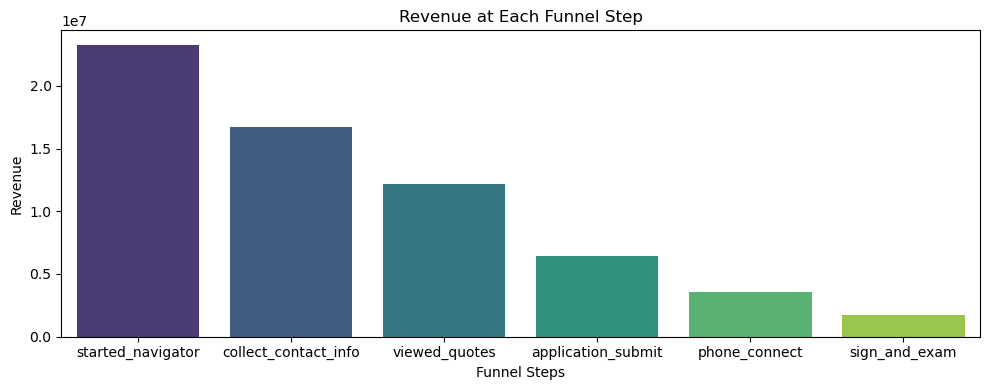

In [11]:
# Create a bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='funnel_steps', y='revenue', data=revenue_summary, palette='viridis')
plt.title('Revenue at Each Funnel Step')
plt.xlabel('Funnel Steps')
plt.ylabel('Revenue')
#plt.xticks(rotation=90)  # Rotate labels if they are lengthy
plt.tight_layout()  # Adjust the layout
plt.show()

##  How does CPA change through the funnel?

In [25]:
# Provided dictionaries and data
cpa_values = {
    'paid_search_nb': 95,
    'facebook': 150,
    'instagram': 85,
    'podcast': 500,
    'tv': 400
}

# Calculate total marketing cost for each channel based on the number of users entering the funnel (Started Navigator)
initial_users_per_channel = merged_data[merged_data['funnel_steps'] == 'started_navigator']['marketing_channels'].value_counts()
total_marketing_cost_per_channel = {
    channel: cpa_values[channel] * count for channel, count in initial_users_per_channel.items()
}

# Summing up the total marketing cost
total_marketing_cost = sum(total_marketing_cost_per_channel.values())

# Calculating the number of users at each step of the funnel
users_at_each_step = merged_data['funnel_steps'].value_counts()

# Assuming marketing cost is uniformly distributed across all steps (simple approach)
uniform_marketing_cost_per_step = total_marketing_cost / len(users_at_each_step)

# Calculate CPA at each step (Uniform cost approach)
cpa_at_each_step_uniform = uniform_marketing_cost_per_step / users_at_each_step

# Convert to DataFrame for better visualization
cpa_each_step_df = cpa_at_each_step_uniform.reset_index().rename(columns={'index': 'funnel_steps', 'funnel_steps': 'CPA'})

# Display the CPA at each step
print(cpa_uniform_df)


           funnel_steps         CPA
0     started_navigator   45.784000
1  collect_contact_info   63.412742
2         viewed_quotes   87.290753
3    application_submit  160.364273
4         phone_connect  300.222951
5         sign_and_exam  583.979592


## Visualisation of the number of users at each funnel steps

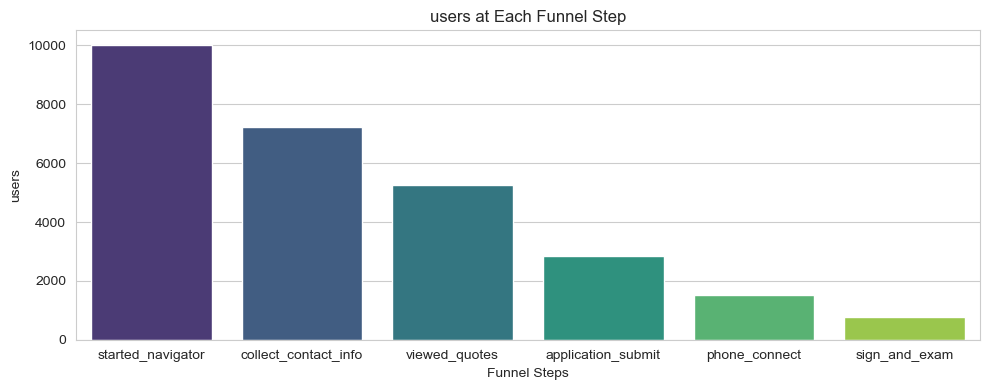

In [47]:
users_at_each_step = merged_data['funnel_steps'].value_counts()
users_each_step_df = users_at_each_step.reset_index().rename(columns={'index': 'funnel_steps', 'funnel_steps': 'users'})
# Create a bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='funnel_steps', y='users', data=users_each_step_df, palette='viridis')
plt.title('users at Each Funnel Step')
plt.xlabel('Funnel Steps')
plt.ylabel('users')
#plt.xticks(rotation=90)  # Rotate labels if they are lengthy
plt.tight_layout()  # Adjust the layout
plt.show()

## Visualisation of CPA at each funnel steps

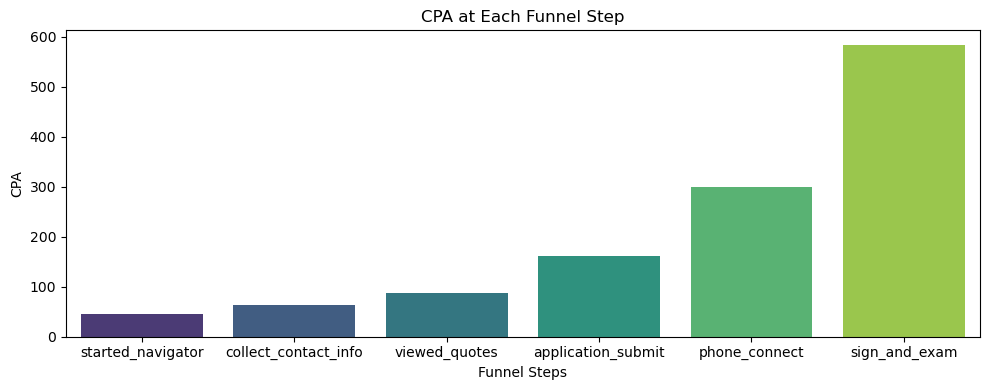

In [26]:
# Create a bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='funnel_steps', y='CPA', data=cpa_each_step_df, palette='viridis')
plt.title('CPA at Each Funnel Step')
plt.xlabel('Funnel Steps')
plt.ylabel('CPA')
#plt.xticks(rotation=90)  # Rotate labels if they are lengthy
plt.tight_layout()  # Adjust the layout
plt.show()

##  What is the conversion rate through the funnel?

The conversion rate at each step of the funnel can be calculated in two ways:

Overall Conversion Rate: This is the proportion of users at each step relative to the number of users who started at the first step of the funnel (Started Navigator). It gives a sense of the overall effectiveness of the funnel from start to finish.

Step-to-Step Conversion Rate: This is the percentage of users who progress from one step of the funnel to the next. It measures the effectiveness of the transition between consecutive steps in the funnel.

The Step-to-Step Conversion Rate gives insight into how effectively users move from one step to the next, while the Overall Conversion Rate provides a sense of how many users make it through the entire funnel relative to the number who started.

In [70]:
# Number of users who started the navigator
initial_users_count = users_at_each_step['started_navigator']

# Calculate step-to-step conversion rates
step_to_step_conversion_rates = (users_at_each_step / users_at_each_step.shift(1) * 100).fillna(0)

# Calculate overall conversion rates
overall_conversion_rates = (users_at_each_step / initial_users_count * 100)

# Combine both overall and step-to-step conversion rates into a DataFrame
conversion_rate_df = pd.DataFrame({
    'funnel_steps': users_at_each_step.index,
    'step_to_step_conversion_rate': step_to_step_conversion_rates.values,
    'overall_conversion_rate': overall_conversion_rates.values
})

# Display the conversion rates at each step
print(conversion_rate_df)


           funnel_steps  step_to_step_conversion_rate  overall_conversion_rate
0     started_navigator                      0.000000                   100.00
1  collect_contact_info                     72.200000                    72.20
2         viewed_quotes                     72.645429                    52.45
3    application_submit                     54.432793                    28.55
4         phone_connect                     53.415061                    15.25
5         sign_and_exam                     51.409836                     7.84


## Conversion Rate Visualisation

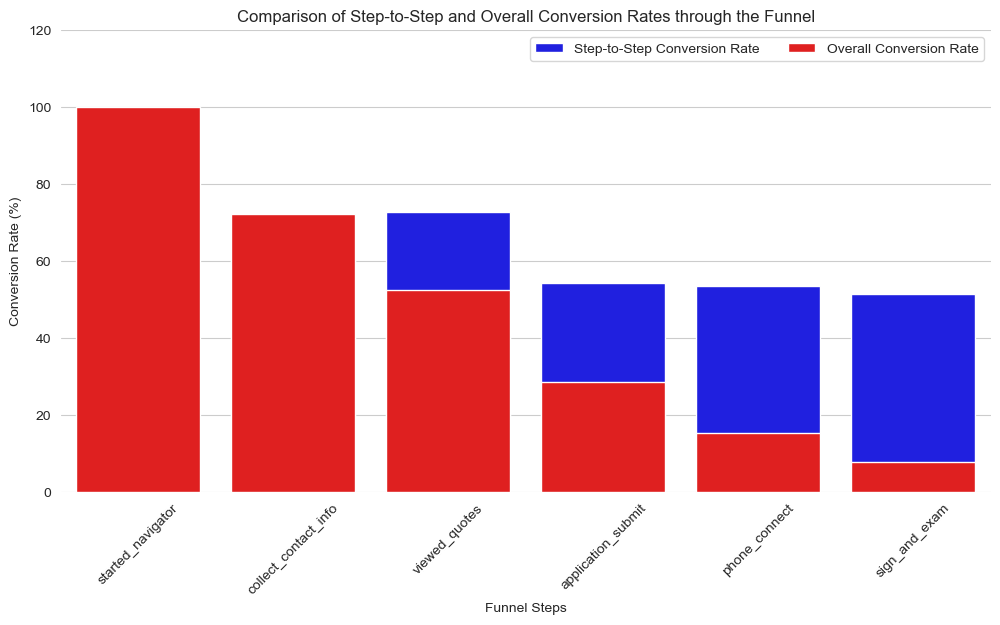

In [45]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 6))

# Plot the step-to-step conversion rate
sns.barplot(x="funnel_steps", y="step_to_step_conversion_rate", data=conversion_rate_df, label="Step-to-Step Conversion Rate", color="b")

# Plot the overall conversion rate alongside
sns.barplot(x="funnel_steps", y="overall_conversion_rate", data=conversion_rate_df, label="Overall Conversion Rate", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylim=(0, 120), ylabel="Conversion Rate (%)", xlabel="Funnel Steps")
ax.set_xticklabels(conversion_rate_df['funnel_steps'], rotation=45)
sns.despine(left=True, bottom=True)

# Display the plot
plt.title('Comparison of Step-to-Step and Overall Conversion Rates through the Funnel')
plt.show()

##  How does our efficiency rate change through the funnel?

These figures represent the efficiency of each step in the funnel, taking into account both the revenue generated and the spend (marketing cost) allocated to each step. It's apparent that the efficiency decreases as we move further down the funnel. This trend could indicate that as users progress through the funnel, the cost of moving them to the next step increases relative to the revenue they generate.

Understanding this trend is crucial for decision-making. To improve overall efficiency, you might consider strategies such as:

Optimizing the Upper Funnel: Since the upper funnel steps show higher efficiency, focusing on increasing the conversion rates at these steps might bring more users into the funnel at a lower relative cost.

Enhancing Conversion at Lower Funnel Steps: The lower funnel steps, despite having lower efficiency, are critical for actual revenue realization. Focusing on increasing conversion rates or optimizing the processes at these steps could significantly impact overall efficiency.

Rethinking Spend Allocation: If certain funnel steps are inherently more expensive but don't correspondingly contribute to revenue, you might need to rethink the marketing spend allocation or find more cost-effective strategies for those steps.

Improving Targeting and Personalization: More precise targeting and personalized user experiences can potentially improve conversion rates and efficiency, especially in the lower funnel steps where the drop-off is significant.

Analyzing User Behavior and Feedback: Understanding why users drop off or don't convert at certain steps could provide insights for improving the funnel design and user experience, thereby enhancing efficiency. 

we assumed a uniform distribution of the total marketing cost across all steps for simplicity. This approach treats "spend" as the uniform marketing cost per step. However, this might not accurately reflect the real-world scenario where the spend to get a user from one step to another might vary significantly.

In [ ]:
# We have the revenue_summary DataFrame from previous steps
# We assumed that marketing cost is uniformly distributed across all steps 
# Add total marketing cost to the revenue summary DataFrame
# The "spend" represent the total cost allocated to acquiring the users that reach a specific step in the funnel. 
revenue_summary['total_marketing_cost'] = uniform_marketing_cost_per_step

# Calculate efficiency as revenue / spend
revenue_summary['efficiency'] = revenue_summary['revenue'] / revenue_summary['total_marketing_cost']

# Display the efficiency at each step of the funnel
print(revenue_summary[['funnel_steps', 'revenue', 'total_marketing_cost', 'efficiency']])


In [46]:
revenue_summary['total_marketing_cost'] = uniform_marketing_cost_per_step
revenue_summary['efficiency'] = revenue_summary['revenue'] / revenue_summary['total_marketing_cost']
revenue_summary

,funnel_steps,revenue,total_marketing_cost,efficiency
0,started_navigator,2.327293e+07,457840.0,50.832018
1,collect_contact_info,1.675934e+07,457840.0,36.605234
2,viewed_quotes,1.213652e+07,457840.0,26.508211
3,application_submit,6.456082e+06,457840.0,14.101176
4,phone_connect,3.596403e+06,457840.0,7.855151
5,sign_and_exam,1.722745e+06,457840.0,3.762767


## Efficiency Visualisation and it's relation to Revenue and Spend

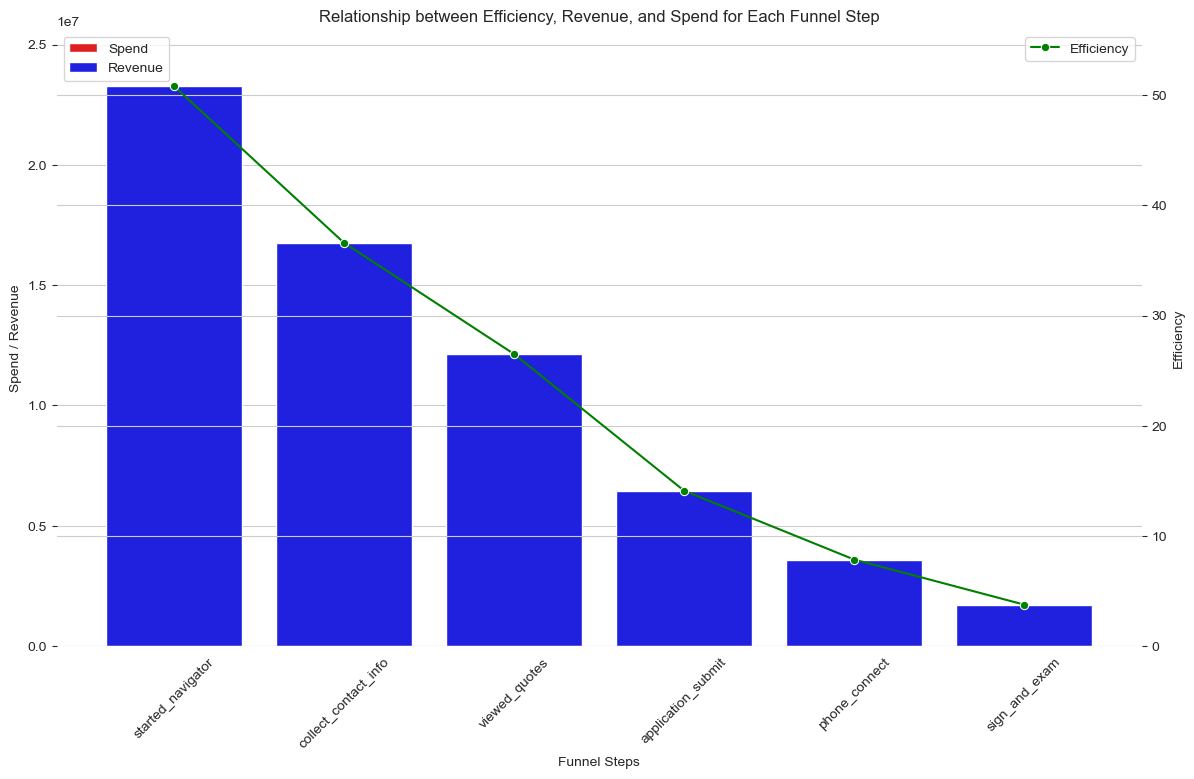

In [48]:
f, ax = plt.subplots(figsize=(14, 8))

# Plot 'spend' as bars
sns.barplot(x="funnel_steps", y="total_marketing_cost", data=revenue_summary, color="r", label="Spend")

# Add 'revenue' as bars
sns.barplot(x="funnel_steps", y="revenue", data=revenue_summary, color="b", label="Revenue")

# Add 'efficiency' as a line plot
ax2 = ax.twinx()
sns.lineplot(x="funnel_steps", y="efficiency", data=revenue_summary, color="g", marker="o", label="Efficiency", ax=ax2)

# Add a legend and informative axis label
ax.legend(loc="upper left", frameon=True)
ax2.legend(loc="upper right", frameon=True)
ax.set(ylim=(0, max(revenue_summary['total_marketing_cost'].max(), revenue_summary['revenue'].max()) * 1.1))
ax2.set(ylim=(0, revenue_summary['efficiency'].max() * 1.1))
ax.set_ylabel('Spend / Revenue')
ax2.set_ylabel('Efficiency')
ax.set_xlabel('Funnel Steps')
ax.set_xticklabels(revenue_summary['funnel_steps'], rotation=45)
sns.despine(left=True, bottom=True)

# Display the plot
plt.title('Relationship between Efficiency, Revenue, and Spend for Each Funnel Step')
plt.show()

## How do you expect these metrics to work together?

Revenue Generation Through Funnel:

This metric provides an overall view of how much revenue is generated as users progress through the funnel.
It helps identify which funnel steps contribute the most to revenue generation and which steps may need improvement.
It's a key indicator of the effectiveness of the entire funnel in generating revenue.

CPA Change:

Tracking how CPA changes through the funnel helps assess the efficiency of marketing spend at different stages.
A decreasing CPA as users progress through the funnel suggests that marketing efforts are becoming more cost-effective in converting users.
An increasing CPA might indicate that it's more challenging or costly to move users to the next stage.

Conversion Rate:

Conversion rates at each step indicate how effectively users are moving from one stage to the next.
High conversion rates suggest a smooth user journey, while low rates may indicate potential bottlenecks or user drop-offs.
Analyzing conversion rates helps pinpoint specific areas in the funnel that need attention and optimization.

Efficiency Rate:

Efficiency, defined as Revenue / Spend, offers an overall measure of how effectively marketing spend is translating into revenue.
It combines both the cost (Spend) and revenue (Revenue) aspects of the funnel.
A high efficiency rate indicates that marketing spend is generating substantial revenue, while a low rate suggests inefficiencies in the process.

These metrics complement each other in assessing the funnel's performance, identifying areas for improvement, and guiding strategies to enhance revenue and efficiency.

- A positive relationship between Conversion Rate and Revenue Generation suggests that improving conversion rates can lead to increased revenue.
- A decreasing CPA alongside a rising Conversion Rate can indicate more efficient marketing efforts, resulting in higher revenue.
- An increasing Efficiency Rate reflects a better return on investment (ROI) as users progress through the funnel.
- These metrics should collectively guide decision-making to optimize the funnel, focusing on steps with low Conversion Rates, high CPAs, or low Efficiency Rates to maximize revenue and efficiency.
